<a href="https://colab.research.google.com/github/durgesh2010/final-hotel-booking-analysis/blob/main/Final_Hotel_booking_data_analysis_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
##This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
##Explore and analyze the data to discover important factors that govern the bookings


#We have a data set which contain booking information of hotels ,lets try to understand dataset and try to explore various factor which is important in hotel booking 

#This data set contains more than 1 lakh rows of information and each row contains booking information of one particular guest.

#Our dataset divided into two hotel types that's city hotel and resort hotel and it consists of information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. 
#We will perform exploratory data analysis with python to get insight from the data.

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#directory path
hotel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/python/Hotel Booking Analysis/Hotel Bookings.csv')


#Let's have a look on data

In [ ]:
#let's see dataframe
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#Let's check info about our dataframe

In [ ]:
#checking info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Lets first create a copy of dataframe

In [ ]:
#creating copy of dataframe
hotel_df_copy=hotel_df.copy()

#Statistical Summary of our data

In [ ]:
#Statistical summary
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# printing all the columns name 
hotel_df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#To understand our dataframe, it is important to understand what the information each column contains and also we have to understand that how we can use these information to analyse and explore our data

#Each column defines different attribute of our dataframe, these attribute have different datatype,if any columns(attribute)  contains categorical values it means that complete columns will contain categorical values only 
#for example hotel column in our data set contain type of hotel (city or resort) 
#if any column contain numerical values it means that complete column will contain numerical values only 

#After understanding the columns and the data contain by these columns ,we also need to understand what is the expected value for each columns 

#Before analyzing or exploring data it is reallly important to clean our data because we want our analysis to be accurate.

#There are some unexpected values,null or missing values so lets clean our dataframe so that we can use the cleaned dataframe for further analysis.

#Now lets check how many missing or null values are there in each column

In [ ]:
#checking null values and sorting in descending order
hotel_df_copy.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

#As we can see,we have missing or null value in four columns (Agent,company,country,children)


#Lets replace these columns null values
#If there is no Agent id or company id in one particular row it means particular guest has booked directly without any agent or company. So, we can replace null or missing value with zero in both columns. 


In [ ]:
#replacing the null value of agent and company columns
hotel_df_copy[['agent','company']]=hotel_df_copy[['agent','company']].fillna(0)

#**Now, we will replace null values in country columns.**
# We will replace the null values in the country column with the name of most appeared country in the dataframe.


In [ ]:
#finding which country is occuring most of time 
hotel_df_copy['country'].mode()

0    PRT
dtype: object

# PRT is most occurred country in country column ,so we are replacing null values of country column with 'PRT'

In [ ]:
#replacing the null value in country column
hotel_df_copy['country'].fillna('PRT',inplace=True)

# Now we will handle the null values in Children column
#we will replace children column's null values with zero as if there is null values in children columns it means that there is no children with Adults.

In [ ]:
#replacing null values with zero in children column
hotel_df_copy['children'].fillna(0,inplace=True)

#We have replaced all the null values in our dataframe.Now we will check data type of each column. 
#Data type is also important, for example if any column contains number then data type must be integer.

#There are some columns like children ,agent,company which contain numbers  but the data type is float in our dataframe so we will convert these columns data type into integer

In [ ]:
# type conversion of columns from float to int
hotel_df_copy[['agent','company','children']]=hotel_df_copy[['agent','company','children']].astype('int64')

#Till now, we have replaced null values and also changed the data types. 
# Now we will deep dive into the dataframe.

# On proper analysis of the dataframe, we found that there are some rows with Zero guest i.e, Adults + Children + Babies = 0. So we are dropping these rows.

In [ ]:
# droping the row in which the number of customer is zero
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.children+hotel_df_copy.adults+hotel_df_copy.babies)==0].index)

#Finally, we have cleaned our dataframe.So, now we can analyze or play with our data so let's have some fun !!!

In [ ]:
# A view on the cleaned dataframe
hotel_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

#In our dataframe, the 'arrival_date_month' is in string format, we will create a function which converts 'arrival_date_month' to its respective month number. (using month name we can't sort our dataframe properly that's why we created this function convert_month_to_int) 

In [ ]:
def convert_month_int(str):
  ''' 
  this function take month name (like march) as argument and return month number (like for march it will be 3)m 
  '''
  from time import strptime
  month_name=str
  month_name strptime(mont_name,'%B').tm_mon
  return month_num

In [ ]:
#creating a funtion which convert 'arrival_date_month' name to respective month number
def convert_month_to_int(str):
  '''
  This funtion take month name (like march) as argument and return month number (like for march its 3)
  '''
  from time import strptime
  month_name=str
  month_num=strptime(month_name,'%B').tm_mon
  return month_num

In [ ]:
# adding new column month number in dataframe
hotel_df_copy['month_number']=hotel_df_copy['arrival_date_month'].apply(convert_month_to_int)

#In our dataframe ,There are two types of hotel, one is resort hotel and another one is city hotel.So let's split our dataframe into two dataframes, 'resort_hotel_df' and 'city_hotel_df'. We will do same analysis for both resort and city hotels because this will gives us a clear picture about both the  hotels. **We are curious to know in hotel booking industry, does same factor govern both City Hotels and Resort Hotels?**

In [ ]:
#creating dataframe for both city and resort hotel 
resort_hotel_df=hotel_df_copy[hotel_df_copy['hotel']=='Resort Hotel']
city_hotel_df=hotel_df_copy[hotel_df_copy['hotel']=='City Hotel']

#'is_canceled' column contains two distinct values

*  # 0- for booking that was not cancelled
*   # 1- for booking that got cancelled




In [ ]:
# creating data frame for both hotel in which guest not canceled their booking 
Not_canceled_city_hotel_dataframe=city_hotel_df[city_hotel_df['is_canceled']==0]
Not_canceled_resort_hotel_dataframe=resort_hotel_df[resort_hotel_df['is_canceled']==0]

# creating a data frame of city and resort hotel in which guest canceled their booking
canceled_city_hotel_dataframe=city_hotel_df[city_hotel_df['is_canceled']==1]
canceled_resort_hotel_dataframe=resort_hotel_df[resort_hotel_df['is_canceled']==1]

#In our dataframe, we have data from **177** countries but most of our data revolves around only ten countries, so we will analyze the ten countries data and try to understand the behaviour of guest and also the booking factors.  

#So first lets see the name of top 10 countries for both city and resort hotels

In [ ]:
#Top ten country for city hotel 
city_hotel_df['country'].value_counts().reset_index().head(10)

,index,country
0,PRT,30877
1,FRA,8791
2,DEU,6082
3,GBR,5307
4,ESP,4604
5,ITA,3302
6,BEL,1894
7,BRA,1792
8,USA,1614
9,NLD,1589


In [ ]:
#Top ten country for resort hotel 
resort_hotel_df['country'].value_counts().reset_index().head(10)

,index,country
0,PRT,18084
1,GBR,6813
2,ESP,3956
3,IRL,2166
4,FRA,1610
5,DEU,1203
6,CN,710
7,NLD,514
8,USA,479
9,ITA,459


# As our analysis is on top 10 countries and the booking behaviours in these countries, we don't need to access whole large dataframe everytime. In the following step, we will create a dataframe having only these 10 countries data.

In [ ]:
#creating new data frame which is containing only top 10 country of city hotel
top_country_city_hotel_df=city_hotel_df[(city_hotel_df['country']=='PRT') | (city_hotel_df['country']=='FRA') | (city_hotel_df['country']=='DEU') | (city_hotel_df['country']=='GBR') | (city_hotel_df['country']=='ESP') | (city_hotel_df['country']=='ITA') | (city_hotel_df['country']=='BEL') | (city_hotel_df['country']=='BRA') | (city_hotel_df['country']=='USA') | (city_hotel_df['country']=='NLD')]


In [ ]:
#creating new data frame which is containing only top 10 country of resort hotel
top_country_resort_hotel_df=resort_hotel_df[(resort_hotel_df['country']=='PRT') | (resort_hotel_df['country']=='FRA') | (resort_hotel_df['country']=='DEU') | (resort_hotel_df['country']=='GBR') | (resort_hotel_df['country']=='ESP') | (resort_hotel_df['country']=='ITA') | (resort_hotel_df['country']=='BEL') | (resort_hotel_df['country']=='BRA') | (resort_hotel_df['country']=='USA') | (resort_hotel_df['country']=='NLD')]


# In the above steps, we have cleaned the data, handled the null values and created a proper framework for our analysis. Now, we will start our analysis and try to see data from various perspectives.

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
special_df=hotel_df[['days_in_waiting_list','booking_changes','previous_bookings_not_canceled','previous_cancellations','lead_time','is_canceled','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','adr','total_of_special_requests']]

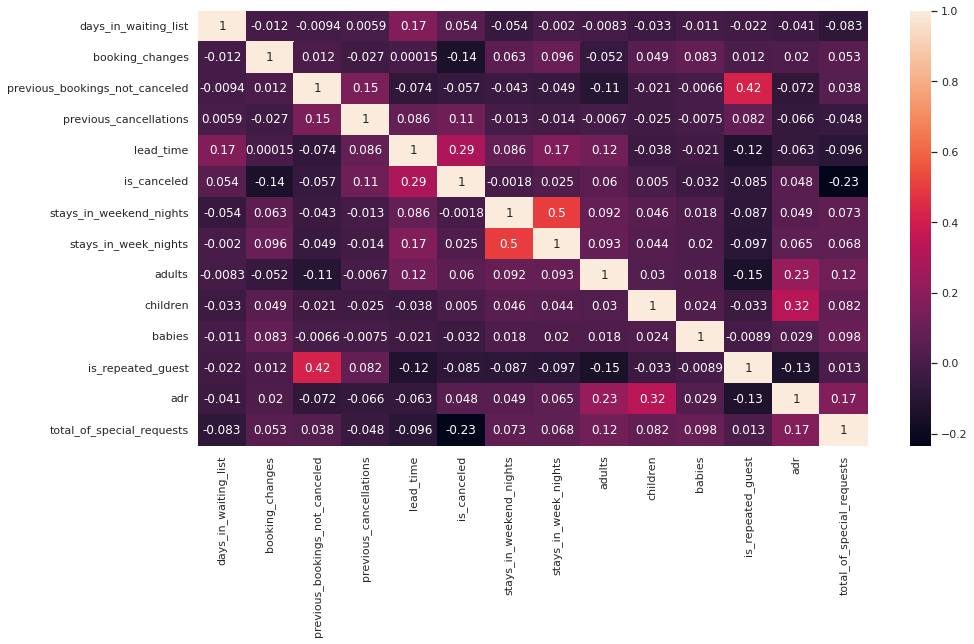

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=special_df.corr(),annot=True)

#**Analysis 1:- From which country most guest come to book hotels?**

#It is really important to understand that from which country most guest come. This will give us a clear picture of country wise citizen booking behaviour.

#To calculate number of guests from each country, we created dataframes for both city and resort hotels in which we included the guest who did not cancel their bookings once they booked the hotel.
#We use country column of dataframe , country column in dataframe contain all the country name


In [ ]:
# Creating Dataframe for guest who did not cancel the booking in city hotel 
Not_canceled_top_city_hotel_df=top_country_city_hotel_df[top_country_city_hotel_df['is_canceled']==0]
# counting the number of guest in each country 
city_hotel_guest_count=Not_canceled_top_city_hotel_df['country'].value_counts().reset_index()


In [ ]:
#renaming the column name
city_hotel_guest_count.rename(columns={'index':'country','country':'number of guest in city hotel'},inplace=True)
# replacing index with country
city_hotel_guest_count.set_index('country',inplace=True)
# sorting value by index(country)
city_hotel_guest_count.sort_index(inplace=True)

In [ ]:
# guest who not cancelled the booking 
Not_canceled_top_resort_hotel_df=top_country_resort_hotel_df[top_country_resort_hotel_df['is_canceled']==0]
# counting the number of guest in each country 
resort_hotel_guest_count=Not_canceled_top_resort_hotel_df['country'].value_counts().reset_index()


In [ ]:
#renaming the column name
resort_hotel_guest_count.rename(columns={'index':'country','country':'number of guest in resort hotel'},inplace=True)
# replacing index with country
resort_hotel_guest_count.set_index('country',inplace=True)
# sorting value by index(country)
resort_hotel_guest_count.sort_index(inplace=True)

In [ ]:
# concanting resort and city hotel
city_and_resort_hotel_guest_df=pd.concat([city_hotel_guest_count,resort_hotel_guest_count],axis=1)
#sorting the data set
city_and_resort_hotel_guest_df.sort_values('number of guest in city hotel',ascending=False,inplace=True)


Text(0, 0.5, 'number of guest')

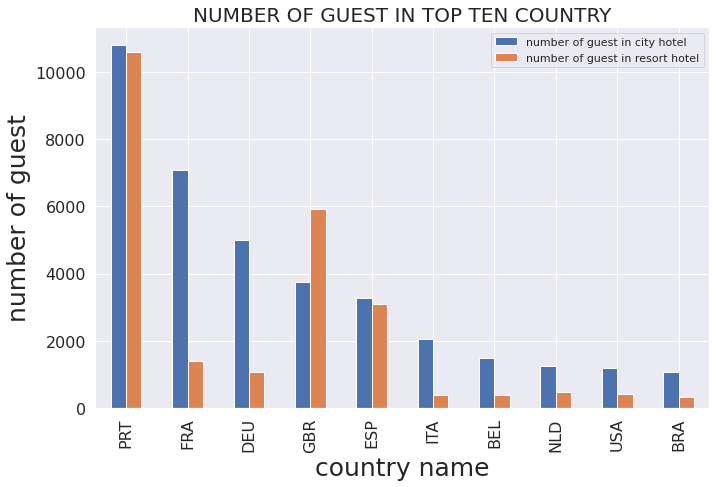

In [ ]:
ax=city_and_resort_hotel_guest_df.plot.bar(figsize=(11,7),fontsize=16)
# setting title
ax.set_title('NUMBER OF GUEST IN TOP TEN COUNTRY',fontsize=20)
ax.set_xlabel('country name',fontsize=25)
ax.set_ylabel('number of guest',fontsize=25)

# We used bar chart to represent number of guests, we thought this is the best way to represent data in bar chart if we have fixed number or value By looking at bar chart it is clearly visible that most of the guests come from top five country PRT,FRA,DEU,GBR,ESP and most of guest preffered to stay in city hotel compare to resort hotel ,we think this is due to rent of both hotel and also for individual or two or three people its best to stay in city hotel compare to resort hotels
 
# There is one country GBR (united kingdom) consists of England,scotland Wales and northern ireland. Here guests prefered resort hotel not city hotel,so there may be two possibilities:

*  # Most of the hotels are resort hotels not city hotels
*  # They preferred to book resort hotels more than City Hotel.


#This analysis helped us to understand booking behaviour of guests,for example if any person is coming from GBR country then its better to offer resort hotel.
#We analysed from which country most guests came from,after that a question arises like what would be the trend of booking and cancellation in a year.



---



# **Analysis 2:-What would be booking and cancellation trend for city and resort hotels in a year?**

#To analyze confirmed booking trend in a year we used dataframe in which guest who did not cancel their booking is included,
#For this analysis we use two column of dataframe 

* # **arrival_date_month** :- This columns contain month of arrival date (month name)
* # **month_number** :-This column contain numberic information about month for example for january month this column contain 1 and december its 12.





In [ ]:
# counting how many guest in both hotel not canceled thier booking 
city_hotel_booking_df=Not_canceled_city_hotel_dataframe.groupby(['arrival_date_month','month_number'])['is_canceled'].count().reset_index()
resort_hotel_booking_df=Not_canceled_resort_hotel_dataframe.groupby(['arrival_date_month','month_number'])['is_canceled'].count().reset_index()

# sorting the month name using month number
city_hotel_booking_df.sort_values('month_number',ascending=True,inplace=True)
resort_hotel_booking_df.sort_values('month_number',ascending=True,inplace=True)

In [ ]:
# making arrival_date_month as our data frame index
city_hotel_booking_df.set_index('arrival_date_month',inplace=True)
resort_hotel_booking_df.set_index('arrival_date_month',inplace=True)

# now the sorting is done so droping month number column
city_hotel_booking_df.drop('month_number',axis=1,inplace=True)
resort_hotel_booking_df.drop('month_number',axis=1,inplace=True)


In [ ]:
#renaming column name
city_hotel_booking_df.rename(columns={'is_canceled':'number of booking in city hotel'},inplace=True)
resort_hotel_booking_df.rename(columns={'is_canceled':'number of booking in resort hotel'},inplace=True)

#concating dataframe
city_and_resort_hotel_booking_df=pd.concat([city_hotel_booking_df,resort_hotel_booking_df],axis=1)

In [ ]:
city_and_resort_hotel = pd.concat([city_hotel_booking_df,resort_hotel_booking_df],axis=1)

#Till now we have analysed the trend of confirmed booking in a year ,lets look what is trend of cancellation in a year

In [ ]:
# counting how many guest in both hotel not canceled thier booking 
canceled_city_hotel_booking_df=canceled_city_hotel_dataframe.groupby(['arrival_date_month','month_number'])['is_canceled'].count().reset_index()
canceled_resort_hotel_booking_df=canceled_resort_hotel_dataframe.groupby(['arrival_date_month','month_number'])['is_canceled'].count().reset_index()


In [ ]:
# sorting the month name using month number
canceled_city_hotel_booking_df.sort_values('month_number',ascending=True,inplace=True)
canceled_resort_hotel_booking_df.sort_values('month_number',ascending=True,inplace=True)


# making arrival_date_month as our data frame index
canceled_city_hotel_booking_df.set_index('arrival_date_month',inplace=True)
canceled_resort_hotel_booking_df.set_index('arrival_date_month',inplace=True)

In [ ]:
# now the sorting is done so droping month number column
canceled_city_hotel_booking_df.drop('month_number',axis=1,inplace=True)
canceled_resort_hotel_booking_df.drop('month_number',axis=1,inplace=True)


In [ ]:
#renaming column name
canceled_city_hotel_booking_df.rename(columns={'is_canceled':'number of canceled booking in city hotel'},inplace=True)
canceled_resort_hotel_booking_df.rename(columns={'is_canceled':'number of canceled booking in resort hotel'},inplace=True)

# concating dataframe
canceled_city_and_resort_hotel_booking_df=pd.concat([canceled_city_hotel_booking_df,canceled_resort_hotel_booking_df],axis=1)

Text(0, 0.5, 'number of guest')

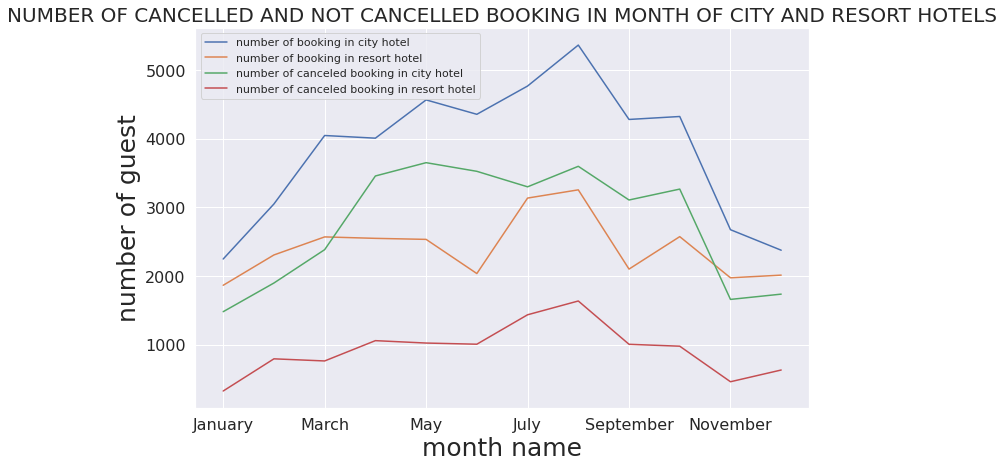

In [ ]:
Not_canceled_and_canceled_city_hotel_df=pd.concat([city_and_resort_hotel_booking_df,canceled_city_and_resort_hotel_booking_df],axis=1)
ax=Not_canceled_and_canceled_city_hotel_df.plot(figsize=(11,7),fontsize=16)
# setting title
ax.set_title('NUMBER OF CANCELLED AND NOT CANCELLED BOOKING IN MONTH OF CITY AND RESORT HOTELS',fontsize=20)
ax.set_xlabel('month name',fontsize=25)
ax.set_ylabel('number of guest',fontsize=25)

#We used line plot to represent booking and cancellation data of a year because we want to understand booking and cancellation trend ,to represent trend line plot is the best way.
#By looking over line plot we can clearly say that from june to august month there is an increasing trend of booking in both city hotel and resort hotels. So, we can say that maximum booking happend in June,July and August month. It is very less at the starting and ending of year. 
#And booking and cancellation trend is very similar it means if more guests are booking hotels then cancellation of booking also increases.


 

#The above analysis helped us to understand booking and cancellation trend for both hotels. It has given us an overall idea that the booking is maximum in a specific period of year. 
#Our next objective is to see how the bookings are varying in week days and weekend.



---



# **Analysis 3:- How many week nights and weekend nights guest stay in both hotels in a year?**

#After this analysis we will be able to understand which is the most preferred timing for guests to book hotel room, is it during the Weekdays or Weekends?
#In this analysis we used two columns of the dataframe: 
 
*   # **Stay_in weekend_night**:-This column contains number of weekend nights (saturday and sunday)  the guest stayed or booked to stay in the hotel.
*   # **Stay_in_week_night**:- This column contain number of week night (monday to friday) the guest stayed or booked to stay in the hotel.

In [ ]:
 #finding the totel number of stay in weekend night in city hotel
city_hotel_stay_in_weekend_booking_df=Not_canceled_city_hotel_dataframe.groupby(['arrival_date_month','month_number'])['stays_in_weekend_nights'].sum().reset_index()
# finding the totel number of stay in weekend night in resort hotel
resort_hotel_stay_in_weekend_booking_df=Not_canceled_resort_hotel_dataframe.groupby(['arrival_date_month','month_number'])['stays_in_weekend_nights'].sum().reset_index()


In [ ]:
# finding the totel number of stay in week night in city hotel
city_hotel_stay_in_week_booking_df=Not_canceled_city_hotel_dataframe.groupby(['arrival_date_month','month_number'])['stays_in_week_nights'].sum().reset_index()
# finding the totel number of stay in week night in resort hotel
resort_hotel_stay_in_week_booking_df=Not_canceled_resort_hotel_dataframe.groupby(['arrival_date_month','month_number'])['stays_in_week_nights'].sum().reset_index()

In [ ]:
# sorting the month name using month number
city_hotel_stay_in_weekend_booking_df.sort_values('month_number',ascending=True,inplace=True)
resort_hotel_stay_in_weekend_booking_df.sort_values('month_number',ascending=True,inplace=True)
city_hotel_stay_in_week_booking_df.sort_values('month_number',ascending=True,inplace=True)
resort_hotel_stay_in_week_booking_df.sort_values('month_number',ascending=True,inplace=True)


In [ ]:
# making arrival_date_month as our data frame index
city_hotel_stay_in_weekend_booking_df.set_index('arrival_date_month',inplace=True)
resort_hotel_stay_in_weekend_booking_df.set_index('arrival_date_month',inplace=True)
city_hotel_stay_in_week_booking_df.set_index('arrival_date_month',inplace=True)
resort_hotel_stay_in_week_booking_df.set_index('arrival_date_month',inplace=True)

In [ ]:
# now the sorting is done so droping month number column
city_hotel_stay_in_weekend_booking_df.drop('month_number',axis=1,inplace=True)
resort_hotel_stay_in_weekend_booking_df.drop('month_number',axis=1,inplace=True)
city_hotel_stay_in_week_booking_df.drop('month_number',axis=1,inplace=True)
resort_hotel_stay_in_week_booking_df.drop('month_number',axis=1,inplace=True)

In [ ]:
# renaming the column names
city_hotel_stay_in_weekend_booking_df.rename(columns={'stays_in_weekend_nights':'Total stay in weekand nights for city hotel'},inplace=True)
resort_hotel_stay_in_weekend_booking_df.rename(columns={'stays_in_weekend_nights':'Total stay in weekand nights for resort hotel'},inplace=True)
city_hotel_stay_in_week_booking_df.rename(columns={'stays_in_week_nights':'Total stay in week nights for city hotel'},inplace=True)
resort_hotel_stay_in_week_booking_df.rename(columns={'stays_in_week_nights':'Total stay in week nights for resort hotel'},inplace=True)

In [ ]:
#concanating the dataframes
city_andresort_hotel_total_stay_in_week_weekand_df=pd.concat([city_hotel_stay_in_week_booking_df,city_hotel_stay_in_weekend_booking_df,resort_hotel_stay_in_week_booking_df,resort_hotel_stay_in_weekend_booking_df],axis=1)

Text(0, 0.5, 'total stay in night')

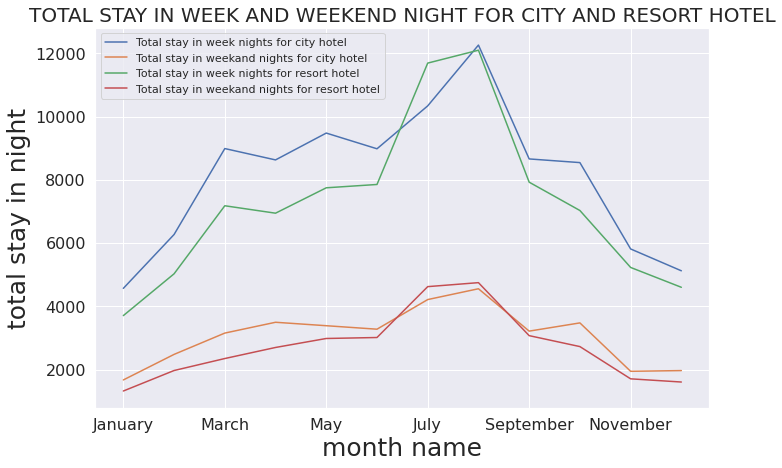

In [ ]:
ax=city_andresort_hotel_total_stay_in_week_weekand_df.plot(figsize=(11,7),fontsize=16)
# setting title
ax.set_title('TOTAL STAY IN WEEK AND WEEKEND NIGHT FOR CITY AND RESORT HOTEL',fontsize=20)
ax.set_xlabel('month name',fontsize=25)
ax.set_ylabel('total stay in night',fontsize=25)

# After looking over line plot, guest preferred weekdays to stay in hotel except june,july, and august month. We think this is due to on week days guest book hotel room for official purposes mostly.

#In these months Weekend booking suddenly rises as compared to rest of the months in the year. 

# In the above analysis, we dived deep into the data and tried to see whether the bookings are made on weekdays or weekends.
# All the analysis till now are centered on bookings and going forward we will analyse the data based on price.


# The main concern from a guest's point of view is to find the best room at a cheaper price. In the further analysis, we will try to address this concern.



---



# **Analysis 4 :- When the best time of year to book a hotel room is?**

# For this analysis we used one column of the dataframe: 

*   # 'adr' column: **ADR** is basically **average daily rate** ,which is calculated by dividing the sum of all lodging transaction by total number of staying night.
# The average daily rate (ADR) shows how much revenue is made per room on average. The higher the ADR, the better. A rising ADR suggests that a hotel is increasing the money it's making from renting out rooms. To increase the ADR, hotels should look into ways to boost price per room.
# The average daily rate (ADR) measures the average rental revenue earned for an occupied room per day.

# ADR is a numeric data so before we start our analysis first let see variation of average daily rate 

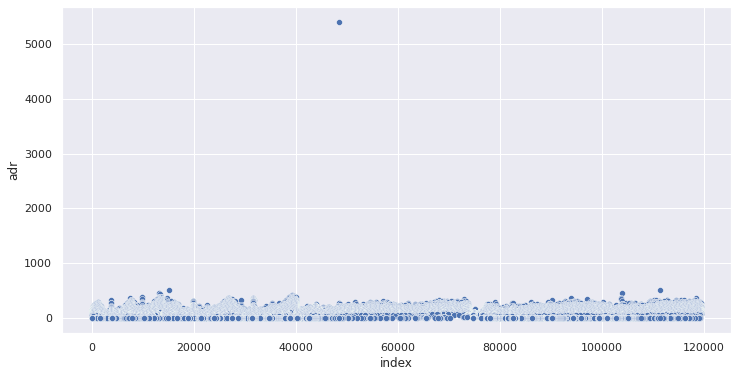

In [ ]:
# creating a new dataframe which contain only adr column
Adr_df=hotel_df_copy['adr'].reset_index().sort_values(by='adr',ascending=False).set_index('index')
#changing size of scatter plot
fig = plt.gcf()
fig.set_size_inches(12, 6)
# plotting scatter plot 
sns.scatterplot(data=Adr_df,x='index',y='adr')

# We used scatter plot to show all adr value of dataset and the scatter plot is the best way to represent all numeric value in single plot  

# In our dataframe most of average daily rate value is below 500 but their is one value of adr which is above 5000.
# so lets see outlier of adr column and if outlier is exremely high then we will remove these outliers from dataframe because Outliers can impact our analysis.
# In adr column there is one value which is extremely high. So, before searching for other outliers we will remove this extreme value.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


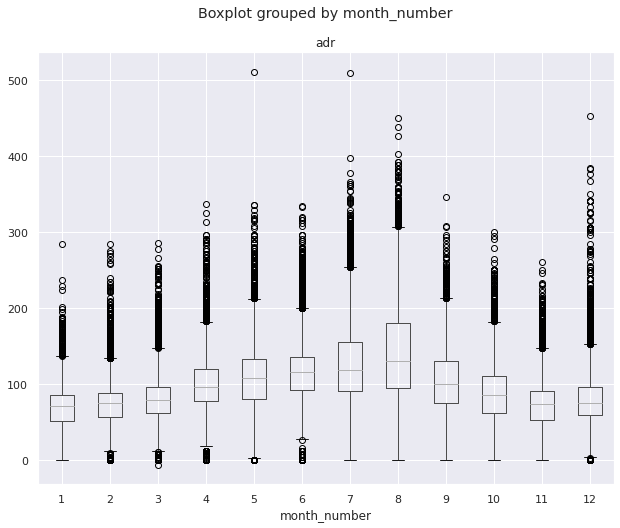

In [ ]:
# removing that extreme value of ADR
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.adr)>5000].index)
# adding one new column month number in data frame
hotel_df_copy['month_number']=hotel_df_copy['arrival_date_month'].apply(convert_month_to_int)

# plotting box plot
hotel_df_copy.boxplot(by ='month_number', column =['adr'], grid =True,figsize=(10, 8))

# The median of Adr for first and last 4 months of the year is below 100 and for (may to august) median is above 100. This is due to highest booking in hotel as we have already analysed that from june to august their is increasing trend of booking due to holidays.


# In box plot we saw that the outlier in each month of year for adr. Here we have already removed only one outlier that lies above 5000 and keep all other points as they will not impact our data that much.

# We have only one financial data which is ADR (average daily rate) ,so lets analyze the data and try to find out  the best time of the year to book hotel

In [ ]:
#finding mean of adr by month wise
top_country_adr_mean_citys_hotel__df=top_country_city_hotel_df.groupby(['country','month_number'])['adr'].mean().round().unstack()
top_country_adr_mean_resorts_hotel__df=top_country_city_hotel_df.groupby(['country','month_number'])['adr'].mean().round().unstack()

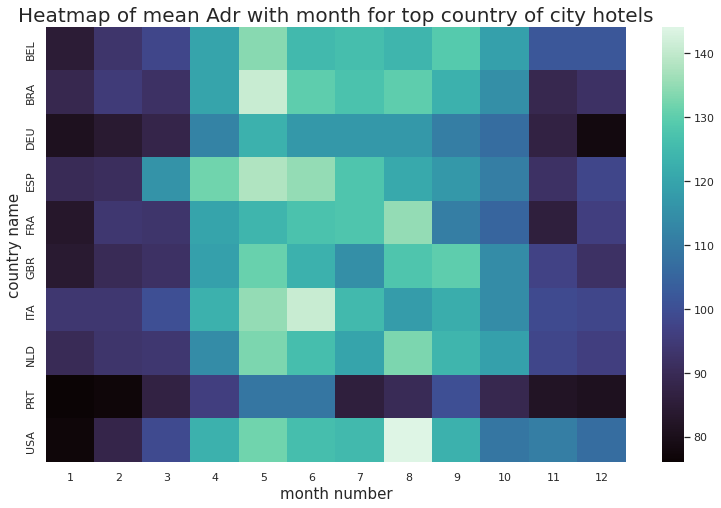

In [ ]:
# plotting heatmap for top ten country 
plt.subplots(figsize=(13,8))
sns.heatmap(top_country_adr_mean_citys_hotel__df,cmap="mako")
# title with fontsize 20
plt.title('Heatmap of mean Adr with month for top country of city hotels', fontsize = 20)
# x-axis label with fontsize 15 
plt.xlabel('month number', fontsize = 15) 
# y-axis label with fontsize 15
plt.ylabel('country name', fontsize = 15) 

plt.show()

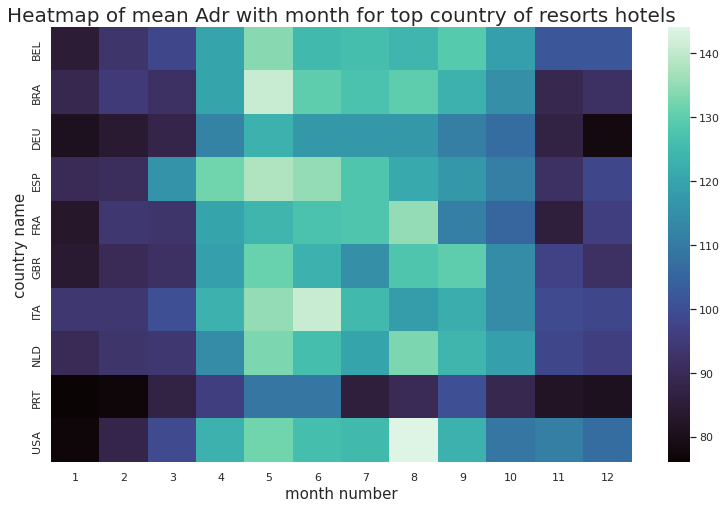

In [ ]:
# plotting heatmap for top ten country 
plt.subplots(figsize=(13,8))
sns.heatmap(top_country_adr_mean_resorts_hotel__df,cmap="mako")
# title with fontsize 20
plt.title('Heatmap of mean Adr with month for top country of resorts hotels', fontsize = 20)
# x-axis label with fontsize 15 
plt.xlabel('month number', fontsize = 15) 
# y-axis label with fontsize 15
plt.ylabel('country name', fontsize = 15) 
plt.show()

# Both heatmaps above also coincides and confirm our previous analysis that in holiday season (Middle of the year) when the number of bookings is at peak, ADR is also high. This also supports the notion that "When demand of product is high, Price of product also increases".

In [ ]:
# getting minimum value of adr month wise for city hotel
df_m1=top_country_adr_mean_citys_hotel__df.idxmin(axis=1).reset_index().rename(columns={0:'month number for city hotel'})
df_m2=top_country_adr_mean_citys_hotel__df.min(axis=1).reset_index().rename(columns={0:'min_adr_of_city_hotel','country':'country1'})

#concating dataframe
min_month_citys_adr_df=pd.concat([df_m1,df_m2],axis=1).drop(['country1','country'],axis=1)

In [ ]:
# getting minimum value of adr month wise for resort hotel
df_m3=top_country_adr_mean_resorts_hotel__df.idxmin(axis=1).reset_index().rename(columns={0:'month number for resort hotel'})
df_m4=top_country_adr_mean_resorts_hotel__df.min(axis=1).reset_index().rename(columns={0:'min_adr_of_resort_hotel','country':'country1'})
min_month_resorts_adr_df=pd.concat([df_m3,df_m4],axis=1).drop('country1',axis=1)



In [ ]:
# concating dataframe
citys_resorts_hotel_mean_adr_df=pd.concat([min_month_citys_adr_df,min_month_resorts_adr_df],axis=1).set_index('country')

citys_resorts_hotel_mean_adr_df

,month number for city hotel,min_adr_of_city_hotel,month number for resort hotel,min_adr_of_resort_hotel
country,,,,
BEL,1,85.0,1,85.0
BRA,1,89.0,1,89.0
DEU,12,78.0,12,78.0
ESP,1,90.0,1,90.0
FRA,1,83.0,1,83.0
GBR,1,84.0,1,84.0
ITA,1,94.0,1,94.0
NLD,1,90.0,1,90.0
PRT,1,76.0,1,76.0


# Looking over the dataframe we can say that for city hotel the best month to book hotel is JANUARY and for resort hotel the best to book hotel is NOVEMBER

#Above analysis helped us to find out the months of the year when ADR is lowest.

# The possible reason we can state that in these months (December and January), bookings are quite low and to attract customers, hotels decrease their rate. Once the rate is decreased, it impacts the ADR of the hotel.



---



# **Analysis 5 :- ADR is an important tool to understand the trend in hotel industry. In this analysis, we will see how the ADR is changing Year to Year and what insights, we are getting from this trend?**

In [ ]:
# doing groupby operation to find average ADR for each year by hotel wise
mean_adr_of_resort_city_hotel=hotel_df_copy.groupby(['hotel','arrival_date_year'])['adr'].mean().unstack()

Text(0, 0.5, 'MEAN ADR')

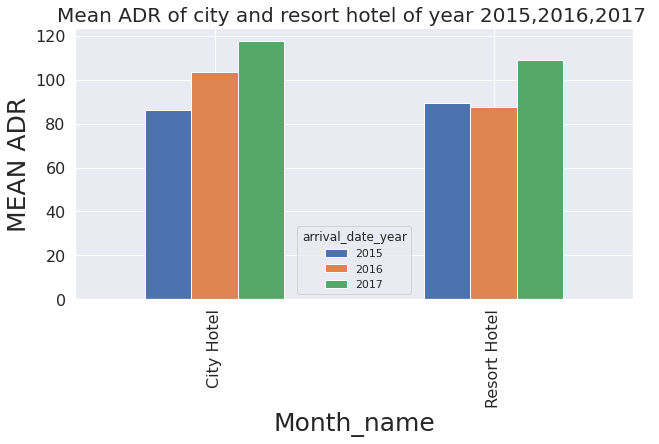

In [ ]:
# plotting bar plot for both hotels mean average daily rate by year wise
ax=mean_adr_of_resort_city_hotel.plot.bar(figsize=(10,5),fontsize=16)
ax.set_title('Mean ADR of city and resort hotel of year 2015,2016,2017 ',fontsize=20)
ax.set_xlabel('Month_name',fontsize=25)
ax.set_ylabel('MEAN ADR',fontsize=25)

# Higher the ADR or rising ADR means the hotel is making money through renting, we can see in this bar plot that revenue generated by hotel industry is increasing year by year. 

# We used bar plot to represent mean value of adr for each year, because there is exact numeric value so bar chart is the best way to represent. 
#In city hotels the growth in average daily rate is increasing year by year, it means that the hotels' revenue is growing year by year by renting room. In resort hotel also if we talk about year 2015 and year 2017 then growth is visible in bar chart.

#This analysis helps us to understand that revenue of the hotel industry is increasing each year,it means hotels are generating more and more revenue by renting rooms.



---



# **Analysis 6:-  What is the optimal length of stay in hotels?**

#For this analysis we are using three column of dataframe
#stay_in_week_day,stay_in_weekend

#For length of Stay in hotel,we consider arrival date of the guest and the number of nights the guest is planning to stay at the hotel.

#This means that the guest is going to pay the same room rate per night for all the nights booked for the stay.

In [ ]:
# adding a new column which contain length of day a particular customer stayed in hotel 
hotel_df_copy['day_of_stay']=hotel_df_copy['stays_in_weekend_nights']+hotel_df_copy['stays_in_week_nights']

In [ ]:
# if any guest stayed in hotel for zero day we are removing that row 
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.day_of_stay)==0].index)

In [ ]:
# creating data frame for both city and resort hotel 
day_of_stay_city_hotel_df=hotel_df_copy[hotel_df_copy['hotel']=='City Hotel']
day_of_stay_resort_hotel_df=hotel_df_copy[hotel_df_copy['hotel']=='Resort Hotel']

In [ ]:
# we only need guest who did not cancel their booking to create new data frame
Not_canceled_stay_in_city_hotel_df=day_of_stay_city_hotel_df[day_of_stay_city_hotel_df['is_canceled']==0]
Not_canceled_stay_in_resort_hotel_df=day_of_stay_resort_hotel_df[day_of_stay_resort_hotel_df['is_canceled']==0]

#Average length of stay  = Total Occupied Room Nights / Number of Bookings 
#Based on this let's calculate length of stay for both city hotels and resort hotels.

In [ ]:
#calculating length of stay for both hotels
length_of_stay_for_city_hotel=Not_canceled_stay_in_city_hotel_df['day_of_stay'].sum()/Not_canceled_stay_in_city_hotel_df['day_of_stay'].count()
length_of_stay_for_resort_hotel=Not_canceled_stay_in_resort_hotel_df['day_of_stay'].sum()/Not_canceled_stay_in_resort_hotel_df['day_of_stay'].count()

#printing the average length of stay 
print(length_of_stay_for_city_hotel)
print(length_of_stay_for_resort_hotel)

2.9338686099535267
4.19610589718448


#For city hotels average length of stay is 2 to 3 days and for resort hotels average length of stay is 4 to 5 days
#**The higher the length of stay, the lower service cost for hotel.**
#we can understand above line by a example ,so suppose a couple book hotels for 5 nights and that's the only booking you received ,your will have to manage only one room service
#On the other hand, if you receive 5 bookings for 1 night each from different guests, the staff will have to manage 5 different rooms,so it is increasing not only the overall workload but the labor costs also.

#**Longer the length of stay is the key to generate higher revenue.**
#There are other benefits of using length of stay pricing. Instead of putting hard restrictions on minimum length of stay or maximum length of stay, hotels can play around with Length of Stay pricing. For example, if hotels don’t want anyone to stay for just 1 night,then it's so important that hotels Length of stay price for 2 nights is more attractive than the length  of stay price for only 1 night.


#Length of stay are the easiest way to maximize revenue.It also encourages guests for staying longer at hotels which also help hotels to building loyalty with the guest.

# Till now we analysed various factors of booking. Apart from all other facilities provided by hotel ,meal is the most important one ,so lets try to analyse which meal is most preffered in both the hotels.



---



# **Analysis 7:- Which is the most preferred meal in various countries?**

# For this analysis we will use 'meal' column of dataframe ,this column contained choice of meal by guest 

In [ ]:
# couting meal over country  for city hotels
Not_canceled_top_city_hotel_df.groupby('country')['meal'].value_counts().unstack()

meal,BB,FB,HB,SC
country,,,,
BEL,1246.0,NaN,67.0,166.0
BRA,847.0,NaN,9.0,207.0
DEU,3274.0,NaN,1182.0,554.0
ESP,2616.0,NaN,226.0,436.0
FRA,5741.0,NaN,449.0,879.0
GBR,2763.0,NaN,89.0,894.0
ITA,1345.0,NaN,431.0,273.0
NLD,1013.0,NaN,18.0,227.0
PRT,8631.0,8.0,1180.0,976.0


In [ ]:
# couting meal over country  for resort hotels
Not_canceled_top_resort_hotel_df.groupby('country')['meal'].value_counts().unstack()

meal,BB,FB,HB,SC,Undefined
country,,,,,
BEL,287.0,1.0,98.0,2.0,1.0
BRA,300.0,1.0,26.0,NaN,2.0
DEU,532.0,1.0,518.0,5.0,1.0
ESP,1918.0,87.0,804.0,8.0,288.0
FRA,902.0,5.0,400.0,1.0,91.0
GBR,4549.0,25.0,1316.0,12.0,20.0
ITA,323.0,1.0,52.0,NaN,3.0
NLD,416.0,NaN,42.0,NaN,NaN
PRT,8443.0,174.0,1525.0,33.0,428.0


# In top countries, most preferred meal by guests is Bread and Breakfast(BB) in both resort and city hotels 




---



#**Analysis 8:- In Which country Waiting Days are Maximum :-**

# Waiting for a service is an annoying experience for all guests and might negatively affect the guests’ **perception** about that service provider. When guests face such as a long waiting period before their stay, their overall experience with the provider might be affected due to the duration of waiting.


# When guests are not served in an acceptable amount of time, the evaluation of the **experience** could be negatively influenced, directly affecting guests’ satisfaction. 

# **Early** **anticipations** about potential guests help the service provider to manage the actual waiting time. The information gathered about expected guests help the service provider reduce the actual waiting times.

* # Creating a scatter plot of column "days_in_waiting_list" to see where the majority of data belongs to, of both city and resort hotel
* # Scatter plot is the best way to know how the data is spreading overall. 

Text(0.5, 1.0, 'Scatter plot of Waiting Days column')

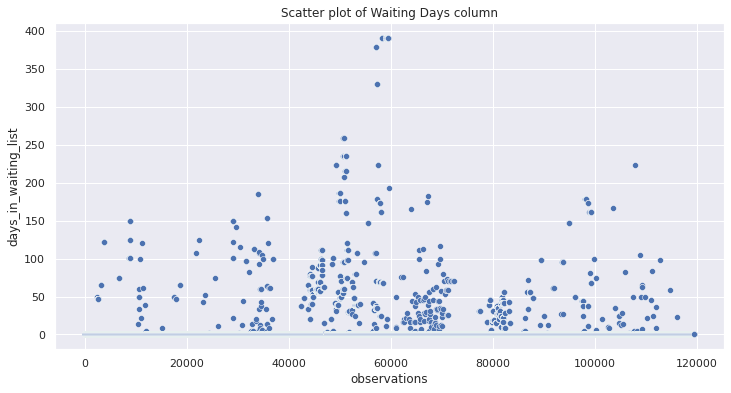

In [ ]:
# creating a new dataframe which contain only days_in_waiting_list column
waiting_days_df=hotel_df_copy['days_in_waiting_list'].reset_index()
waiting_days_df.rename(columns = {'index':'observations'},inplace = True)
waiting_days_df.sort_values(by='days_in_waiting_list',ascending=False).set_index('observations')

#changing size of scatter plot
fig = plt.gcf()
fig.set_size_inches(12, 6)

# plotting scatter plot 
sns.scatterplot(data = waiting_days_df,x='observations',y='days_in_waiting_list')
plt.title("Scatter plot of Waiting Days column")

# From the above scatter plot, it is clearly visible that the majority of waiting days are less than 150 , above that may be for some exceptional events or can be mistakenly taken. For further analysis, we are going to consider the following points:-
* # As the waiting days are spread across wide range, we are taking median to get a clear picture of data and easy computation and also median will not be effected by outlier.
* # After analysing the data we understood that most of the data are from only 10 countries. So, we are considering the data from 10 countries in further analysis that is creating large impact.
* # As we have seen above rare data ( waiting days above 150 days) are very less. Taking **median** of the data will give us almost close to the actual data.  
* # Dividing the data set into City and Resort hotel and taking top 10 countries.


# Analysis of Waiting days for top 10 countries of City hotel

In [ ]:
# but before that lets take top country city hotel with waiting days that has one or more than that waitings
hotel_df_for_waiting_days_of_city_hotel = top_country_city_hotel_df[top_country_city_hotel_df['days_in_waiting_list']>0]

In [ ]:
# total number of waiting days by top 10 countries
# Country wise waiting days and sorting them by country wise in descending
days_in_waiting_list_of_top_country_city_hotel = hotel_df_for_waiting_days_of_city_hotel.groupby(['country']).agg({'days_in_waiting_list':'median'}).sort_values(by='country',ascending=[False])
# renaming the column days in waiting list according to city hotel
days_in_waiting_list_of_top_country_city_hotel.rename(columns = {'days_in_waiting_list':'waiting days of city hotel'},inplace = True)
days_in_waiting_list_of_top_country_city_hotel.sort_values(by='waiting days of city hotel',ascending=[False])

,waiting days of city hotel
country,
DEU,162.0
USA,96.0
NLD,63.0
BEL,63.0
FRA,61.0
PRT,47.5
ITA,44.0
ESP,33.0
BRA,15.0


# Analysis of Waiting days for top 10 Resort hotel

In [ ]:
# Same for the Resort hotel as we did for city hotel 
# top country resort hotel with waiting days that has one or more than one waitings
hotel_df_for_waiting_days_of_resort_hotel = top_country_resort_hotel_df[top_country_resort_hotel_df['days_in_waiting_list'] > 0]

In [ ]:
# total number of waiting days by top 10 countries
# Country wise waiting days and sorting them by country wise in descending
days_in_waiting_list_of_top_country_resort_hotel = hotel_df_for_waiting_days_of_resort_hotel.groupby(['country']).agg({'days_in_waiting_list':'median'}).sort_values(by='country',ascending=[False])
# renaming the column days in waiting list as waiting days of resort hotel
days_in_waiting_list_of_top_country_resort_hotel.rename(columns = {'days_in_waiting_list':'waiting days of resort hotel'},inplace = True)
days_in_waiting_list_of_top_country_resort_hotel.sort_values(by='waiting days of resort hotel',ascending=[False])

,waiting days of resort hotel
country,
NLD,185
BEL,185
BRA,125
PRT,122
GBR,101
DEU,93
ESP,65


In [ ]:
# concatenation city and hotel waiting days 
waiting_list_of_city_and_resort_hotel = pd.concat([days_in_waiting_list_of_top_country_city_hotel ,days_in_waiting_list_of_top_country_resort_hotel],axis = 1)

Text(0, 0.5, 'Median of Waiting Days')

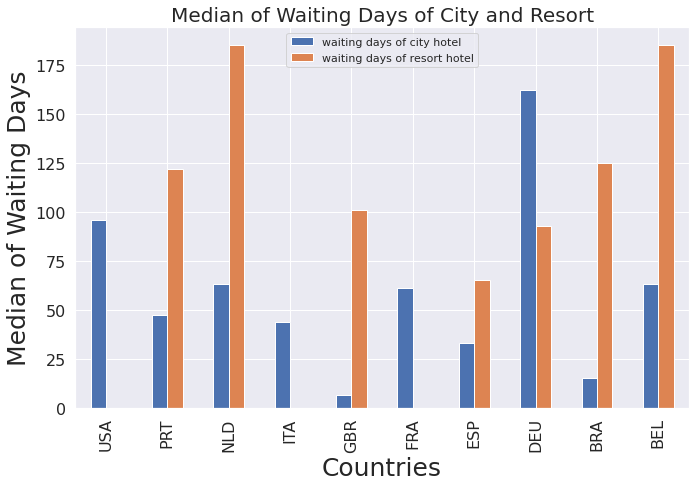

In [ ]:
# plot of waiting days of both city and resort hotel
ax=waiting_list_of_city_and_resort_hotel.plot.bar(figsize=(11,7),fontsize=16)
ax.set_title('Median of Waiting Days of City and Resort',fontsize=20,)
ax.set_xlabel('Countries',fontsize=25)
ax.set_ylabel('Median of Waiting Days',fontsize=25)

# In the above plot, we can see comparision of the waiting period in City and Resort Hotels in Top 10 countries
* # **Incredible!** USA, ITA, and FRA have zero waitings in resort hotels i.e **unbelievable**.
* # Overall waiting days in city hotels is less than resort hotels and the reason can be the availibilty of rooms in city hotel is more than resort hotels.
* # City Hotels are easily available across a wide range from economical class to premium class. City  hotels are usually just a place only for lodging while a Resort hotels allows for more privacy, entertainment, and experiences during the stay. 
* # The above reasons indicate us why waiting days are more in Resort Hotel as compared to City hotel.






---



# **Analysis 9:-Booking Analysis of Different Type of Customers.**

# In this analysis, we will try to understand the customer behaviour and answer some of the questions like **What are different customer types, and which type of customers has made more number of bookings and cancellations?**

In [ ]:
# taking columns 'customer_type'& 'reservation_status' of city hotel
customer_status_of_city_hotel = city_hotel_df[['customer_type','reservation_status']]
to_plot_customer_status_of_city_hotel = customer_status_of_city_hotel.value_counts().unstack()
to_plot_customer_status_of_city_hotel     

reservation_status,Canceled,Check-Out,No-Show
customer_type,,,
Contract,1085,1191,20
Group,27,262,2
Transient,26379,32193,700
Transient-Party,4673,12438,193


#In the above Dataframe, we can see different types of customers:-

* # Contract - when the booking has an allotment or other type of contract associated to it;
* # Group – when the booking is associated to a group

* # Transient – when the booking is not part of a group or contract, and is not associated to other transient booking

* # Transient-party – when the booking is transient, but is associated to at least other transient booking.


# We can analyse the following key points looking at the above Dataframe:-

* # **'Transient'** Customer type  has more number of check_out as well as cancellation
* # We are familiar with Check Out and Canceled reservation status but there are some cutomers with 'No-Show'.  "No-Show" means the customer who has a guaranteed reservation does not cancel it before the hotel's cancellation deadline, and never arrives to claim the reservation .




In [ ]:
# we are taking top 3 customer types which has maximum data

by_pie_chart_of_city_hotel = customer_status_of_city_hotel.value_counts().head(6)

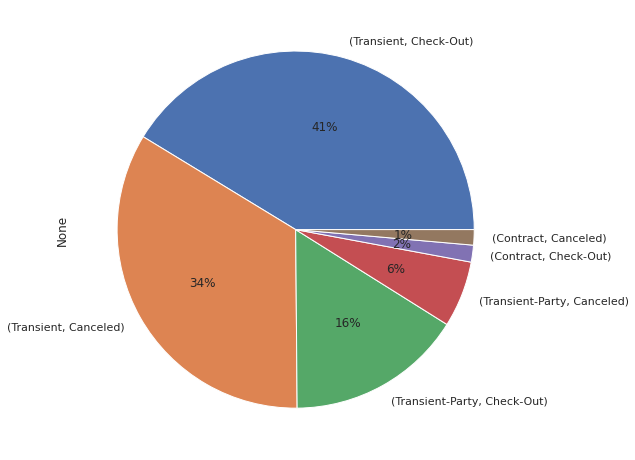

In [ ]:
# Through pie Chart with major entries_of_city_hotel
plot = by_pie_chart_of_city_hotel.plot.pie(y='status', figsize=(8, 10),autopct='%.0f%%')


In [ ]:
# Now For Resort hotel
# taking columns 'customer_type'& 'reservation_status' of resort hotel
customer_status_of_resort_hotel = resort_hotel_df[['customer_type','reservation_status']]
to_plot_customer_status_of_resort_hotel = customer_status_of_resort_hotel.value_counts()
to_plot_customer_status_of_resort_hotel     

customer_type    reservation_status
Transient        Check-Out             20789
                 Canceled               9159
Transient-Party  Check-Out              6265
Contract         Check-Out              1619
Transient-Party  Canceled               1492
Transient        No-Show                 256
Group            Check-Out               254
Contract         Canceled                151
Transient-Party  No-Show                  27
Group            Canceled                 27
Contract         No-Show                   6
Group            No-Show                   2
dtype: int64

In [ ]:
# we are taking top 6 rows which has maximum data
# Through pie Chart with major entries_of_resort_hotel
by_pie_chart_of_resort_hotel = customer_status_of_resort_hotel.value_counts().head(6)


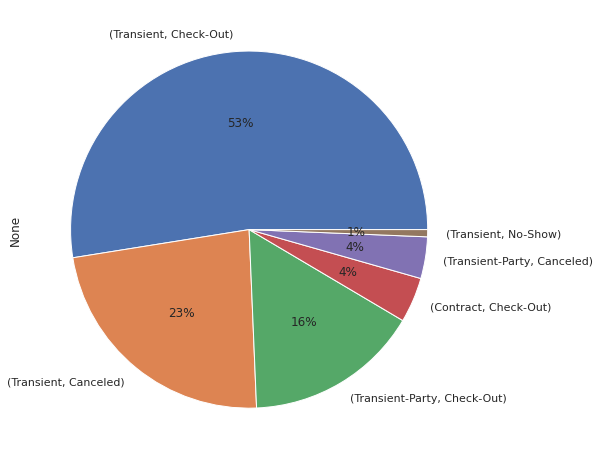

In [ ]:
plot = by_pie_chart_of_resort_hotel.plot.pie(y='status', figsize=(8, 10),autopct='%.0f%%')

* # After comparing pie plot of City and Resort hotel it is clear that "Transient Type " customers have higher check outs as well as cancellations and the percentage of cancellations in resort type is less than city hotels.
# In Resort Hotels, maximum bookings which are converted to check-out is 53% done by Transient Customers but the cancellations here is maximum (23%) also for Transient Customers.
* # If we come to the City Hotel, percentage shrinked to around 41% "Transient Check-Outs" and Transient Cancellations around 34% which is not good as compare to Resort Hotel. But another reason can be number of bookings, yes in the City Hotel a lot of bookings so the probability of cancellation also increases.   



---



#**Analysis 10:- Most Booked Accomodation Types:-**
* # Considering the given data in three categories Couple,single and family or group for getting most booked accomodatons.
* # Based on available data we are taking columns "adults","children" and "babies" 
* # we are assuming certain combinations of this three columns :- 
  * # if ['adults' , 'children' , babies] = [ 2 , 0 , 0 ] is Couple.
  * # if ['adults' , 'children' , babies] = [ 1 , 0 , 0 ] is Single.
  * # Other than this two combinations assuming it as "Family or Group "
* # In some of the cases there were unexpected bookings like 55 adults only booked that may be an event or booked for any specific purpose. We can consider it as exceptions.

In [ ]:
# Most booked accomodation type  in city hotel
accomodation_type_city_hotel = city_hotel_df[['adults',	'children',	'babies']].value_counts().reset_index()
accomodation_type_city_hotel.rename(columns={0:'count'},inplace= True)
# accomodation_type.iloc[2:,-1:].sum()
single_and_couple = accomodation_type_city_hotel.iloc[:2,-1:]
# separate analysis For single and couples
single_and_couple['category'] = ['couple','single']
single_and_couple.set_index('category',inplace= True)
single_and_couple

,count
category,
couple,53526
single,15564


In [ ]:
 # For Family or Group
 family_of_city_hotel = accomodation_type_city_hotel.iloc[2:,-1:].sum().reset_index()
 family_of_city_hotel['category'] = ['family or group']
 family_count = family_of_city_hotel.set_index('category').drop(['index'],axis = 1)
 family_count.rename(columns={0:'count'},inplace= True)
 family_count

,count
category,
family or group,10073


In [ ]:
final_category_for_city_hotel = pd.concat([single_and_couple,family_count])
final_category_for_city_hotel.reset_index(inplace = True)

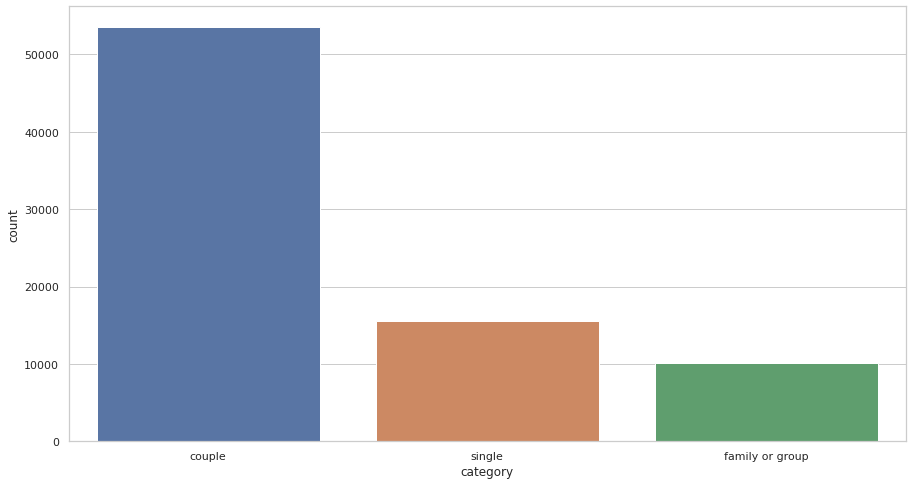

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category", y="count", data=final_category_for_city_hotel)

 # Same operations for Resort hotel let's see what will we get   :-

In [ ]:
# Most booked accomodations in resort hotel
accomodation_type_resort_hotel = resort_hotel_df[['adults',	'children',	'babies']].value_counts().reset_index()
accomodation_type_resort_hotel.rename(columns={0:'count'},inplace= True)
# accomodation_type.iloc[2:,-1:].sum()
single_and_couple = accomodation_type_resort_hotel.iloc[:2,-1:]
# separate analysis For single and couples
single_and_couple['category'] = ['couple','single']
single_and_couple.set_index('category',inplace= True)
single_and_couple

,count
category,
couple,28034
single,7013


In [ ]:
 # For Family or Group
 family_of_resort_hotel = accomodation_type_resort_hotel.iloc[2:,-1:].sum().reset_index()
 family_of_resort_hotel['category'] = ['family or group']
 family_count = family_of_resort_hotel.set_index('category').drop(['index'],axis = 1)
 family_count.rename(columns={0:'count'},inplace= True)
 family_count

,count
category,
family or group,5000


In [ ]:
final_category_for_resort = pd.concat([single_and_couple,family_count])
final_category_for_resort.reset_index(inplace = True)
final_category_for_resort

,category,count
0,couple,28034
1,single,7013
2,family or group,5000


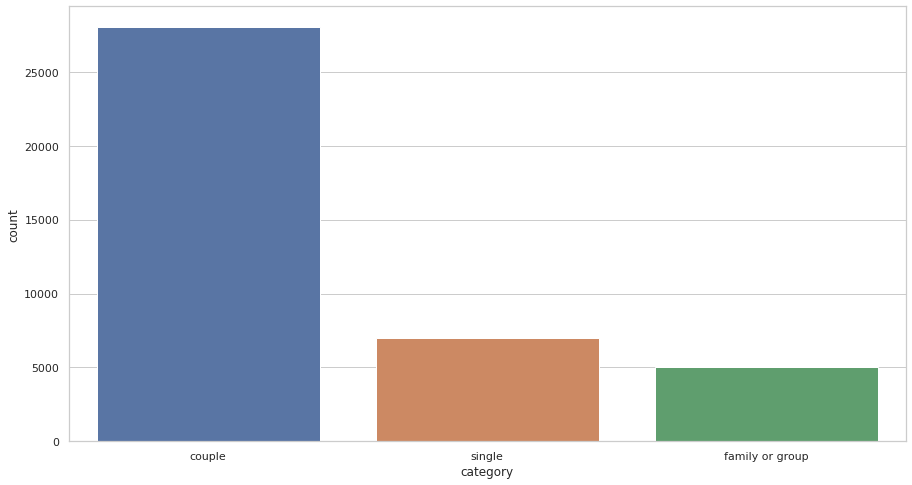

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="category", y="count", data=final_category_for_resort)

# **Couples category bookings** in both City and Resort Hotels exceptionally high than single and family category bookings. Single category has more number of bookings than family but difference is not that much.




---



#**Analysis 11:-Finding mean ADR  in different room types.**

#After this analysis, we will be able to understand and answer the following questions:


# 1.   Which room is generating more revenue for the hotel?
# 2.   Which is the best room available for customer across different price range?
# 3.  Comparing the ADR of room types in City Hotels and Resort Hotels.




In [ ]:
# Creating dataframe for city hotels to store different room types and their mean ADR
city_hotel_room_adr = city_hotel_df.groupby('reserved_room_type')['adr'].mean().sort_values(ascending=[True]).reset_index()

# renaming and sorting 
city_hotel_room_adr.rename(columns={'reserved_room_type':'reserved_room_type_of_city_hotel','adr':'adr in city hotel'},inplace=True)
city_hotel_room_adr.set_index('reserved_room_type_of_city_hotel',inplace = True)
city_hotel_room_adr.sort_index(inplace=True)

In [ ]:
# Creating dataframe for resort hotels to store different room types and their mean ADR
resort_hotel_room_adr = resort_hotel_df.groupby('reserved_room_type')['adr'].mean().sort_values(ascending=[True]).reset_index()
resort_hotel_room_adr
# renaming and sorting 
resort_hotel_room_adr.rename(columns={'reserved_room_type':'reserved_room_type_of_resort_hotel','adr':'adr in resort hotel'},inplace=True)
resort_hotel_room_adr.set_index('reserved_room_type_of_resort_hotel',inplace = True)
resort_hotel_room_adr.sort_index(inplace=True)

In [ ]:
city_and_resort_room_adr = pd.concat([resort_hotel_room_adr ,city_hotel_room_adr],axis = 1)
# city_and_resort_room_adr.reset_index(drop=True, inplace=True)
# city_and_resort_room_adr.set_index('reserved_room_type',inplace = True)

Text(0, 0.5, 'ADR')

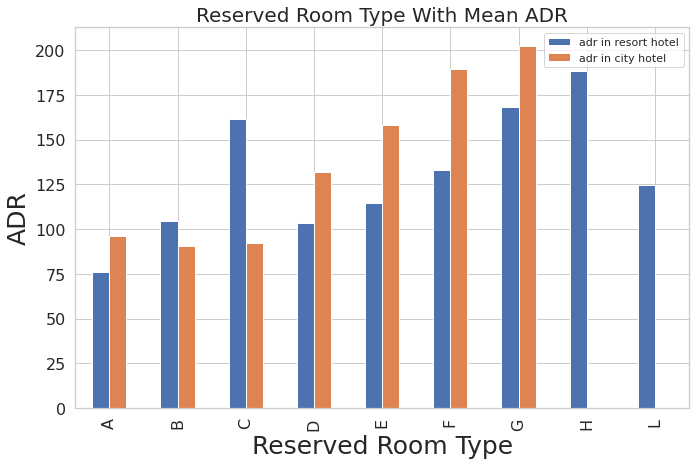

In [ ]:
ax=city_and_resort_room_adr.plot.bar(figsize=(11,7),fontsize=16)
ax.set_title('Reserved Room Type With Mean ADR',fontsize=20)
ax.set_xlabel('Reserved Room Type',fontsize=25)
ax.set_ylabel('ADR',fontsize=25)

# NOTE :- Above plot describing ADR values of different room types of both City and Resort hotel and for H and L type of rooms it's not showing city hotel values as this two rooms are not present in city hotels.

# Before going forward, let's see the number of bookings in these room types and we will add both the analysis to reach to a solid conclusion.

In [ ]:
# Number of bookings in different city hotel room type
city_hotel_df['reserved_room_type'].value_counts() 

A    62484
D    11747
F     1788
E     1537
B     1112
G      482
C       13
Name: reserved_room_type, dtype: int64

In [ ]:
# Number of bookings in different resort hotel room type
resort_hotel_df['reserved_room_type'].value_counts() 

A    23389
D     7432
E     4982
G     1610
F     1106
C      918
H      601
L        6
B        3
Name: reserved_room_type, dtype: int64

#After observing above polt and Data we can conclude few points :- 
#* Room type 'A' has lowest ADR in city hotel and resort hotel. It can be the reason it has more bookings in both hotels as compared to other rooms.
#* Room Type 'C'  has least number of bookings in City hotel and not much booked in Resort as well.  If we observe by city hotel side "ADR" is also not high so that can be concluded Type 'C' is less preferable type of room or it is not well maintained.
#* In City Hotel highest ADR in room type 'G' and may be this the reason it is one of them rooms which has less number of bookings.
#* In the Resort hotel Highest ADR in room type 'H' and it is following similare fashion of room type 'G' in city hotel highest adr so less numbers in bookings.
#* Room type 'B' from Resort hotel has least number of bookings even in a single digit number and also has less ADR.
#* Room type 'c' from city hotel and room type 'B' from resort hotel kind of very less revenue generated type of rooms. 



---



#**Analysis 12:- Room Allocation**
#* Room allocation is one of the most complex and important tasks of guest registration activity. 
#* Room allocation is simply the allocation of rooms to guests so you know how many and exactly which rooms will be occupied by different guests. Room allocation is a basic concept but a vital process necessary to avoid mismanagement. It becomes essential when the hotel becomes busier and you have back-to-back occupancies.


#* So We will calculate the percentage of reserved rooms allocations to assigned Rooms.
#* In other words at what extent hotel managment was able to provide desired room or failed to allocate the booked room to the customer.

In [ ]:
#city hotel Room Allocation 
service = (city_hotel_df['reserved_room_type']==city_hotel_df['assigned_room_type']).value_counts().reset_index()
hotel_service_of_city_hotel=  service.replace({True: 'Allocate', False: 'Failed'}).set_index('index')
hotel_service_of_city_hotel.rename(columns={0:'count'},inplace= True)
hotel_service_of_city_hotel

,count
index,
Allocate,72085
Failed,7078


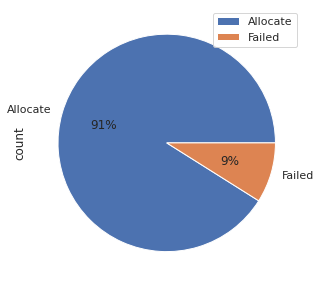

In [ ]:
plot = hotel_service_of_city_hotel.plot.pie(y = 0, figsize=(5, 5),autopct='%.0f%%')

# In the city hotel  only 9 % we got negative result but that is positive news isn't it?

In [ ]:
# resort hotel service
service = (resort_hotel_df['reserved_room_type']==resort_hotel_df['assigned_room_type']).value_counts().reset_index()
hotel_service_of_resort_hotel =  service.replace({True: 'Allocate', False: 'Failed'}).set_index('index')
hotel_service_of_resort_hotel.rename(columns={0:'count'},inplace= True)
hotel_service_of_resort_hotel

,count
index,
Allocate,32329
Failed,7718


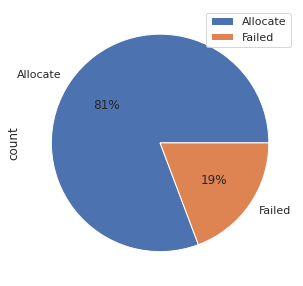

In [ ]:
plot = hotel_service_of_resort_hotel.plot.pie(y = 0, figsize=(5, 5),autopct='%.0f%%')

# In the Resort Hotel 19% customers has to compromise with their choice and that is more than City Hotel.

#* Customer service is more than just providing the paid services for the hotel residents. That's about creating a profound connection between you and the customers and improving their experience journey while staying in your hotel.
# * So compromise of room desired by customer can be a step to not **repeating** the same customer.



---



#**Analysis 13:-Repeated Guest :-**

#While all guests are valuable to the hotel industry but the positive economics of repeating customers can't be ignored.

#According to a study reported in Harvard Business Review, it was found that acquiring a new customer costs anywhere from five to twenty-five times more than keeping an existing customer.


# So it is very importanat to analyse from **where** and **when** we get **Repeated Guest**

In [ ]:
# Data with only repeated guest 
hotel_df_copy_with_repeated_customers = hotel_df_copy[hotel_df_copy['is_repeated_guest']>=1]
# Total number of Repeated guest country wise 
repeated_cutomers = hotel_df_copy_with_repeated_customers['country'].value_counts().reset_index().head(10)

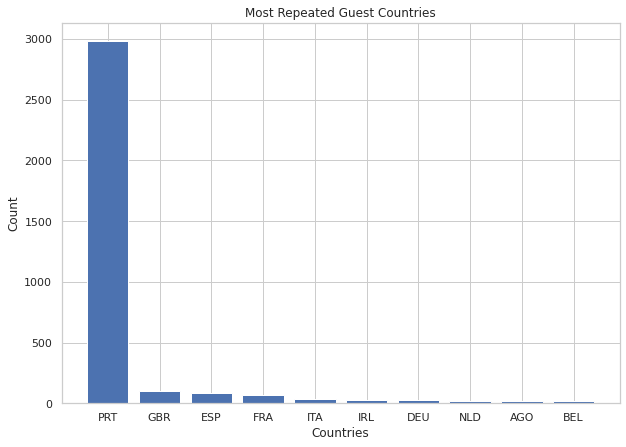

In [ ]:
country = repeated_cutomers['index']
count = repeated_cutomers['country']
# Figure Size
fig = plt.figure(figsize =(10, 7))
fig = plt.title ('Most Repeated Guest Countries')
fig = plt.xlabel('Countries')
fig = plt.ylabel('Count')
# Horizontal Bar Plot
plt.bar(country, count)
# Show Plot
plt.show()

#  By knowing the guests origin it's easy to predict customers behaviour and their choices and that makes easy to serve guest in a better manner.

#So here we get most number of the repeating guest in the country PRT and  it is not surprising because most number of bookings also from the country PRT



In [ ]:
# Now let us see month wise pattern of repeating guest  
repeated_customer_month_wise = hotel_df_copy_with_repeated_customers.groupby(['arrival_date_month']).agg({'is_repeated_guest':'count'})#.reset_index()#.value_counts()
repeated_customer_month_wise.sort_values(by='is_repeated_guest',ascending=[False])

,is_repeated_guest
arrival_date_month,
March,390
January,382
February,381
May,321
July,283
December,276
October,274
April,271
June,267


#Not only origin but to know the month when would be the repeated guests can mostly arrive.

#Forecasting the timing will be easy to manage and delivering a better customer experience.

#As we can see in the first Quarter we get most number of repated guests.



---



#**Analysis 14:-What is Booking Percentage and Cancellation Percentage between Resort Hotel and City Hotel?**



#Before going deep, we have to first analyze what the data is giving us at the outer level. So, we will handle the basic question of which hotel type is preferred more and what are the possible reasons behind it.

#As we have made a copy of the original dataframe **hotel_df**, going further we will use the copy of hotel_df i.e, **hotel_df_copy**.  

In [ ]:
# Creating a Dataframe cancellation_df from hotel_df_copy.
cancellation_df = hotel_df_copy.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
#Rename the column name from 0 & 1 to canceled bookings and confirmed bookings respectively.
cancellation_df.rename(columns = {1:'canceled bookings',0:'confirmed bookings'}, inplace= True)
#Creating a new column to calculate Total Booking as per hotel type
cancellation_df['Total_booking_hotel_wise'] = cancellation_df['confirmed bookings']+ cancellation_df['canceled bookings']


# Creating a variable Total_booking and assigning it the total no. of bookings from 2015 to 2017
Total_booking = cancellation_df['Total_booking_hotel_wise'].sum()
#Calculate the Booking Percentage of Resort hotel and City hotel as compared to Total_booking
cancellation_df['Booking_%_wrt_total_booking'] = (cancellation_df['Total_booking_hotel_wise']/Total_booking)*100

#Plot the Pie chart to Visualise the booking percentage
ax1= cancellation_df.plot.pie(y='Booking_%_wrt_total_booking',figsize=(10,9),fontsize= 15, autopct='%1.2f%%')
ax1.set_title('Overall Booking Analysis\n City Hotel Vs Resort Hotel', fontsize= 20)
ax1.legend(fontsize= 16)

In [ ]:
#Plot the Pie chart to Visualise the booking percentage
ax1= cancellation_df.plot.pie(y='Booking_%_wrt_total_booking',figsize=(10,9),fontsize= 15, autopct='%1.2f%%')
ax1.set_title('Overall Booking Analysis\n City Hotel Vs Resort Hotel', fontsize= 20)
ax1.legend(fontsize= 16)

#As per the given Dataset from the year 2015 to year 2017, City Hotel is preferred by **66.54%** of people. The possible reasons may be because of 
#1. **Low Cost:** The stay at a city hotel is cheaper as compared to Resort Hotel
# 2. **Easy availability:** The number of City Hotel is more than Resort Hotel 
# The above graph shows overall booking status which includes the cancelled booking also, in futher study, we will dig down and study how the cancellation data is affecting our above data?

In [ ]:
# Total_Cancellation will store the summation of column canceled booking
Total_cancellation = cancellation_df['canceled bookings'].sum()
#creating a column to show the Overall cancellation Percentage
cancellation_df['cancellation_%_wrt_total_booking'] = (cancellation_df['canceled bookings']/Total_booking)*100

#Plotting the Overall cancellation Percentage of both City Hotel and Resort Hotel
ax1 = cancellation_df.plot.bar(y= 'cancellation_%_wrt_total_booking', figsize= (10,9), fontsize=16,rot=0)
ax1.set_title('Cancellation Analysis\n City Hotel Vs Resort Hotel', fontsize=20)
ax1.legend(fontsize=15)
ax1.set_xlabel('Hotel Types', fontsize=18)
ax1.set_ylabel('Percentage(%)', fontsize=18)
for index, data in enumerate(cancellation_df['cancellation_%_wrt_total_booking']):
  plt.text(x= index,y=data+0.25, s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

In [ ]:
#Plotting the Overall cancellation Percentage of both City Hotel and Resort Hotel
ax1 = cancellation_df.plot.bar(y= 'cancellation_%_wrt_total_booking', figsize= (10,9), fontsize=16,rot=0)
ax1.set_title('Cancellation Analysis\n City Hotel Vs Resort Hotel', fontsize=20)
ax1.legend(fontsize=15)
ax1.set_xlabel('Hotel Types', fontsize=18)
ax1.set_ylabel('Percentage(%)', fontsize=18)
for index, data in enumerate(cancellation_df['cancellation_%_wrt_total_booking']):
  plt.text(x= index,y=data+0.25, s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

#City_hotel has cancellation of almost 3 times the cancellation of Resort Hotel. The difference was quite massive. This study also give some below mentioned insights.
#1. Easy availability which was a factor in increasing the booking is also responsible for cancellation as the customer has more choice.
#2. The another factor is same as above i.e., Cheap Pricing. As the competition is more between City Hotels, the pricing of hotels tends to be in the lower side. It gives customer more options to choose from at a cheaper price.

#Let's find out the conversion rate of both hotel types. Coversion Rate tells us out of 100 hotels booked, how many will be converted to a confirmed booking.



---



##**Analysis 15:-What is the Conversion Rate of City Hotel and Resort Hotel?**

In [ ]:
# Calculate conversion Rate
cancellation_df['conversion Rate'] = (cancellation_df['confirmed bookings']/cancellation_df['Total_booking_hotel_wise'])*100

# Plotting the bar graph to visualize the conversion rate
ax1 = cancellation_df.plot.bar(y='conversion Rate',figsize= (10,9), width=0.35, fontsize=16, rot=0)
ax1.set_title('Conversion Rate', fontsize=20)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(cancellation_df['conversion Rate']):
  plt.text(x=index , y =data+1 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

In [ ]:
# Plotting the bar graph to visualize the conversion rate
ax1 = cancellation_df.plot.bar(y='conversion Rate',figsize= (10,9), width=0.35, fontsize=16, rot=0)
ax1.set_title('Conversion Rate', fontsize=20)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Conversion Rate', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(cancellation_df['conversion Rate']):
  plt.text(x=index , y =data+1 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=20), ha='center')

#The conversion rate of City Hotel is near to 58% while for Resort Hotel, it is above 70%.

#From Resort Hotel point of view, we can say that, these types of hotel are premium in nature and booked after various types of planning. These hotels are generally used as vacation spots or function spots. Hence, the chances of being cancelled is quite less. The same thing, our data is showing above that conversion rate is much higher that City Hotel.


##In the above questions, we have seen tried to study and compare City Hotel type and resort Hotel Type with each other. Now, we are going to analyse over the years how the trends is changing in both the hotel types. Whether with each year, bookings are increasing, decreasing, or not changing.



---



#**Analysis 16:-What kind of Booking Trend is observed in Resort Hotel and City Hotel over the years?**

#We will create a dataframe **year_wise_df**, which carries the information of canceled booking, confirmed bookings, and the bookings that are NO Show.

In [ ]:
year_wise_df = hotel_df_copy.groupby(['arrival_date_year','hotel','reservation_status'])[['reservation_status']].count().unstack()
year_wise_df['total_booking'] = year_wise_df.sum(level=0, axis=1)
year_wise_df['valid_booking %'] = (year_wise_df[('reservation_status','Check-Out')]/year_wise_df[('total_booking','')])*100

# Create DataFrame from the elemnets of year_wise_df to get the year_wise percentage of booking
valid_booking_df = year_wise_df.groupby(['hotel','arrival_date_year'])['valid_booking %'].mean().unstack()

# Codes to plot the graphs
ax1=valid_booking_df.plot.bar(figsize = (10,9), fontsize = 18, rot=0)
ax1.set_title('Booking Comparision Over the years', fontsize= 18)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Booking Percentage(%)', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(valid_booking_df[2015]):
  plt.text(x=index-0.20 , y =data , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2016]):
  plt.text(x=index , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2017]):
  plt.text(x=index+0.20 , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')

In [ ]:
# Create DataFrame from the elemnets of year_wise_df to get the year_wise percentage of booking
valid_booking_df = year_wise_df.groupby(['hotel','arrival_date_year'])['valid_booking %'].mean().unstack()

In [ ]:
# Codes to plot the graphs
ax1=valid_booking_df.plot.bar(figsize = (10,9), fontsize = 18, rot=0)
ax1.set_title('Booking Comparision Over the years', fontsize= 18)
ax1.set_xlabel('Hotel Types', fontsize=16)
ax1.set_ylabel('Booking Percentage(%)', fontsize=16)
ax1.legend(fontsize=16)
for index,data in enumerate(valid_booking_df[2015]):
  plt.text(x=index-0.20 , y =data , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2016]):
  plt.text(x=index , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')
for index,data in enumerate(valid_booking_df[2017]):
  plt.text(x=index+0.20 , y =data+0.5 , s= f'{round(data,2)}%' , fontdict=dict(fontsize=15), ha='center')

# **What is the trend?**
#We can clearly in the above graph that City Hotel has a rise in booking in the year 2016 but there is again a decline in 2017 but in Resort Hotel, there is clear decline trend over the years from 2015 to 2017



---



#**Analysis 17:-Whether in all countries same type of City Hotel is preferred? If not, list top 10 countries having Resort Hotel as preferred hotel.**

#In the country column there are 488 rows with NaN data. Since there isn't any other column giving us any hint about data that should be in country column against NaN value, it is better to delete the rows for proper analysis.

In [ ]:
# Getting only non Nan values from hotel_df to country_df_withno_na DataFrame
country_df_withno_na= hotel_df_copy.loc[~hotel_df['country'].isna()]
#Getting the country name and respective Resort Hotel and City Hotel bookings count
country_wise_booking_df= country_df_withno_na.groupby(['country','hotel'],sort= False)[['hotel']].count().unstack()

In [ ]:
#Getting the country name and respective Resort Hotel and City Hotel bookings count
country_wise_booking_df= country_df_withno_na.groupby(['country','hotel'],sort= False)[['hotel']].count().unstack()

# *Countries where Resort Hotels are more preferred over City Hotels*
#Due to less price and easy availability, in most of the countries, City Hotels are preferred however you would be excited to know that there are some countries where Resort Hotels are the most preferred hotels. I think, the possible reasons may include but not limited to **the exotic locations**, **great tourist spots** etc.

In [ ]:
Resort_hotel_more_preferred_df = country_wise_booking_df.loc[country_wise_booking_df[('hotel','Resort Hotel')]>country_wise_booking_df[('hotel','City Hotel')],:]

#As we have discussed above about countries having Resort Hotel types as most preferred type. Great Britain (GBR) tops this list and the most suprising thing is that the difference between both hotel types is more than 1500 here. The analysis becomes more accurate if the data is shown in terms of percentage. So, lets do that!!!

In [ ]:
# Calculating the Total Bookings in that country, which sums the bookings of City Hotel and Resort Hotel
Resort_hotel_more_preferred_df['Total Bookings'] = Resort_hotel_more_preferred_df.sum(level= 0, axis=1)

In [ ]:
# Calculate the Resort Hotel %
Resort_hotel_more_preferred_df['Resort Hotel Booking %'] = (Resort_hotel_more_preferred_df[('hotel','Resort Hotel')]/Resort_hotel_more_preferred_df[('Total Bookings','')])*100

In [ ]:
# Calculate the Resort Hotel %
Resort_hotel_more_preferred_df['City Hotel Booking %'] = (Resort_hotel_more_preferred_df[('hotel','City Hotel')]/Resort_hotel_more_preferred_df[('Total Bookings','')])*100

In [ ]:
Resort_hotel_more_preferred_df



---



#**Analysis 18:-Type of room and adr distribution across different months.**

#In this process of analysis, it is very important to understand the variation of room types in different time period of the year. From a customer perspective, it will give a clear picture and judgement on selection of rooms.

In [ ]:
# removing that extreme value of ADR
hotel_df_copy=hotel_df_copy.drop(hotel_df_copy[(hotel_df_copy.adr)>5000].index)

In [ ]:
resort_df=hotel_df_copy.loc[hotel_df_copy['hotel']=='Resort Hotel'][['hotel','arrival_date_month','assigned_room_type','adr']]
city_df=hotel_df_copy.loc[hotel_df_copy['hotel']=='City Hotel'][['hotel','arrival_date_month','assigned_room_type','adr']]

In [ ]:
# Use groupby to get the adr variation in different months across different room types
adr_resort_df= resort_df.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()

In [ ]:
# Sort the months in dataframe we get above as per their occurance
Months_name=['January','February','March','April','May','June','July','August','September','October','November','December']
adr_resort_df.index=pd.CategoricalIndex(adr_resort_df.index, categories=Months_name, ordered=True)
adr_resort_df = adr_resort_df.sort_index()

In [ ]:
# replace Nan with 0
adr_resort_df=adr_resort_df.fillna(0)


In [ ]:
# Use groupby to get the adr variation in different months across different room types
adr_city_df= city_df.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()


In [ ]:
# Sort the months in dataframe we get above as per their occurance
adr_city_df.index=pd.CategoricalIndex(adr_city_df.index, categories=Months_name, ordered=True)
adr_city_df = adr_city_df.sort_index()

In [ ]:
#replace Nan with 0
adr_city_df = adr_city_df.fillna(0)

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,9))
sns.heatmap(adr_resort_df,ax= ax1, linewidths=0.5, annot= True, annot_kws={'size':15}, fmt='0.2f')
ax1.set_ylabel('Month', fontsize=18)
ax1.set_xlabel('Room Types', fontsize=18)
ax1.set_title('ADR variation according to Room Type and Months(Resort Hotel)', fontsize=20)


#In the above heatmap, we can see that the adr of all rooms is almost at its peak in the month of **July and August**. Room types** H** has the highest ADR of **273.54** in the month of August. If we look closely,**H** has ADR > 100 almost entire year. The second room type that comes after **H** is **G**.

In [ ]:
fig, ax2=plt.subplots(figsize= (20,9))
sns.heatmap(adr_city_df,ax=ax2, linewidths=0.5, annot= True, annot_kws={'size':15}, fmt='0.2f')
ax2.set_ylabel('Month', fontsize=18)
ax2.set_xlabel('Room Types', fontsize=18)
ax2.set_title('ADR variation according to Room Type and Months(City Hotel)', fontsize=20)

In City Hotels, room type **G** has the highest ADR in the month of July. Room type **F** comes after G. These two rooms have ADR > 100 entire year. 

# Dev work end